<a href="https://colab.research.google.com/github/Ishikasingh101/Introvert_Extrovert_Predictor/blob/main/Predict_the__Introverts__from_the__Extroverts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!git clone https://github.com/Ishikasingh101/Introvert_Extrovert_Predictor.git
%cd Introvert_Extrovert_Predictor

Cloning into 'Introvert_Extrovert_Predictor'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), done.
/content/Introvert_Extrovert_Predictor


In [14]:
!git checkout -b eda-analysis

Switched to a new branch 'eda-analysis'


In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

In [3]:
print(train.shape)

(18524, 9)


In [4]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB
None


In [35]:
null_percentage = (train.isnull().sum())
#train.isnull().sum()
null_percentage["%miss"] = null_percentage[0] / train.shape[0]
print(null_percentage)

id                              0.0
Time_spent_Alone             1190.0
Stage_fear                      0.0
Social_event_attendance      1180.0
Going_outside                1466.0
Drained_after_socializing       0.0
Friends_circle_size          1054.0
Post_frequency               1264.0
Personality                     0.0
%miss                           0.0
dtype: float64


/tmp/ipython-input-35-2680915993.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  null_percentage["%miss"] = null_percentage[0] / train.shape[0]


In [6]:
print(train.head())

   id  Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0   0               0.0         No                      6.0            4.0   
1   1               1.0         No                      7.0            3.0   
2   2               6.0        Yes                      1.0            0.0   
3   3               3.0         No                      7.0            3.0   
4   4               1.0         No                      4.0            4.0   

  Drained_after_socializing  Friends_circle_size  Post_frequency Personality  
0                        No                 15.0             5.0   Extrovert  
1                        No                 10.0             8.0   Extrovert  
2                       NaN                  3.0             0.0   Introvert  
3                        No                 11.0             5.0   Extrovert  
4                        No                 13.0             NaN   Extrovert  


In [7]:
print(train.columns)

Index(['id', 'Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')


In [8]:
print(train['Personality'].value_counts())

Personality
Extrovert    13699
Introvert     4825
Name: count, dtype: int64


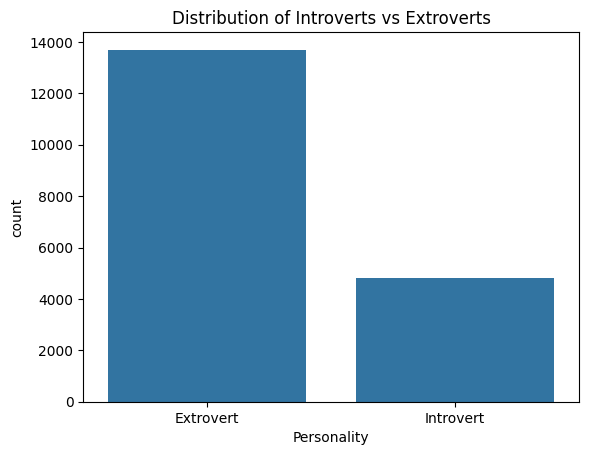

In [9]:
# How many records are labeled as Introvert vs Extrovert.
sns.countplot(x='Personality', data=train)
plt.title("Distribution of Introverts vs Extroverts")
plt.show()

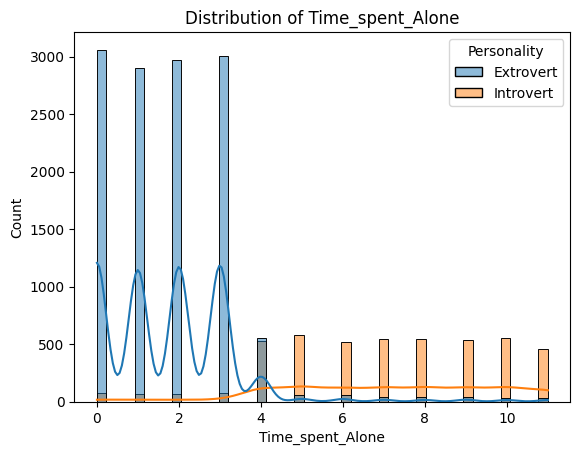

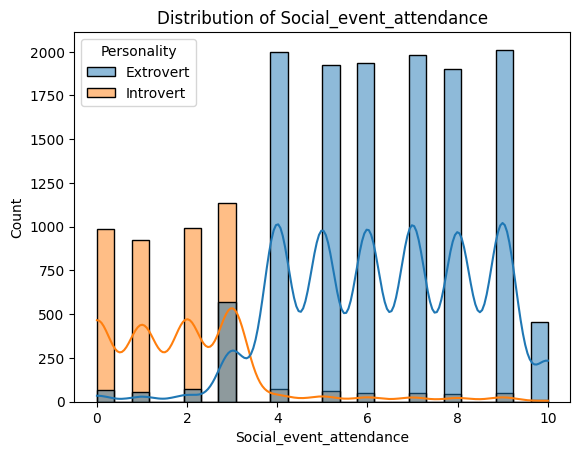

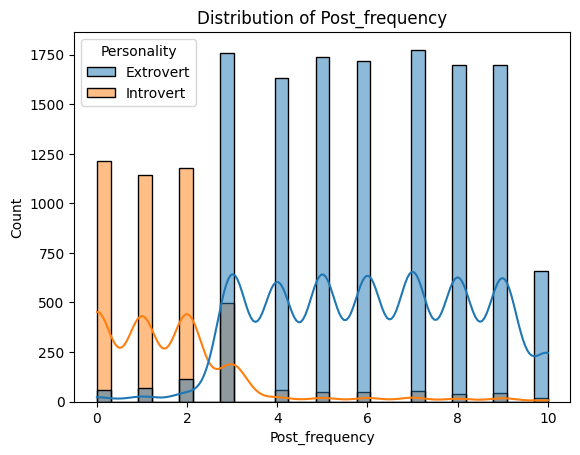

In [10]:
numeric_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Post_frequency']
for col in numeric_cols:
    sns.histplot(data=train, x=col, kde=True, hue= "Personality")
    plt.title(f'Distribution of {col}')
    plt.show()

<Axes: >

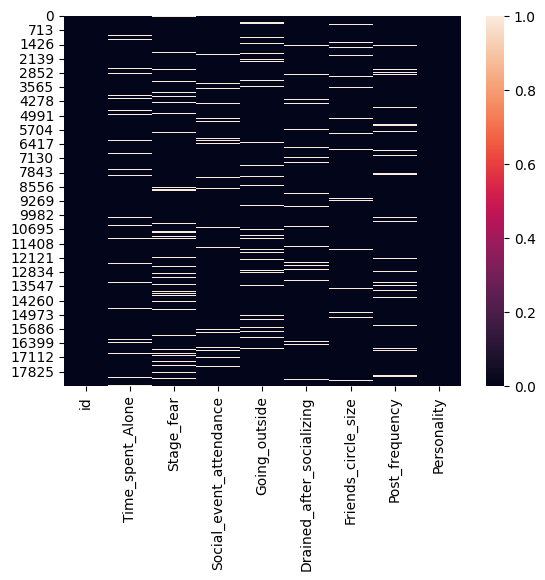

In [11]:
sns.heatmap(train.isnull())

<Axes: >

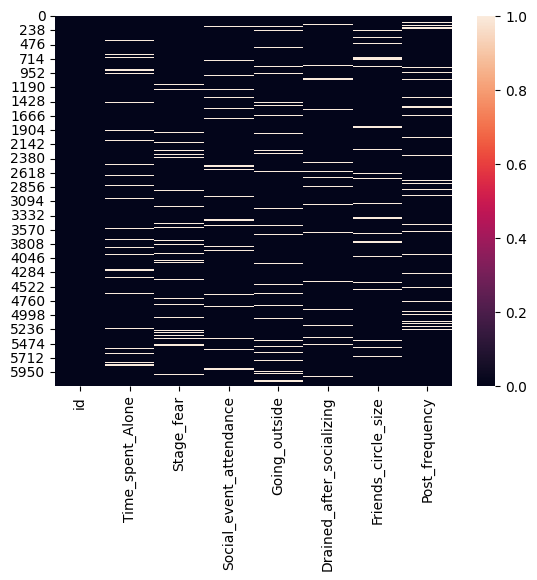

In [12]:
sns.heatmap(test.isnull())

In [17]:
train_data = train.drop(columns=['id'])
test_data = test.drop(columns=['id'])

In [22]:
train_features = train_data.drop(columns=['Personality'])

In [27]:
# Creating KNN Imputer object using 5 nearest neighbors to fill in missing values
imputer = KNNImputer(n_neighbors=5)
train_imputed = imputer.fit_transform(train_features)
test_imputed = imputer.transform(test_data)

In [28]:
# Converting the imputed NumPy arrays back to DataFrames
train_features = pd.DataFrame(train_imputed, columns=train_features.columns)
test_data = pd.DataFrame(test_imputed, columns=test_data.columns)

In [29]:
train_features['Personality'] = train_data['Personality'].values

In [49]:
# Checking if Nulls are filled
print(train_features.isnull().sum())
print(test_data.isnull().sum())

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
dtype: int64


In [50]:
le = LabelEncoder()
train_features['Personality'] = le.fit_transform(train_features['Personality'])

In [51]:
#Train-Test,Split
#seperating the input features and target variables
X = train_features.drop('Personality', axis=1)
y = train_features['Personality']

In [52]:
#Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=30)

In [ ]:
# Model Training